In [1]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [96]:
m,a=np.load('../mcerr/n21156_m0.019_a3.5.npy')
m_mn,a_mn=np.load('../mcerr/n21156_m0.019_a3.5_mean.npy')
mnc,anc=np.load('../mcerr/n21156_m0.019_a3.5_NC.npy')
mnc_mn,anc_mn=np.load('../mcerr/n21156_m0.019_a3.5_NCmean.npy')
mdf,adf=np.load('../mcerr/n21156_m0.019_a3.5_DF.npy')
mdf_mn,adf_mn=np.load('../mcerr/n21156_m0.019_a3.5_DFmean.npy')

In [86]:
def Plot_2d(metal_list, age_list, true_m, true_a, title):
    plt.figure(figsize=[8,8])
    sea.kdeplot(metal_list, age_list)
    plt.scatter(metal_list, age_list, marker='o')
    plt.title(title)
    plt.scatter(true_m, true_a,color='r')
    plt.axis([0,0.03,0,6])
    plt.show()
    plt.close()

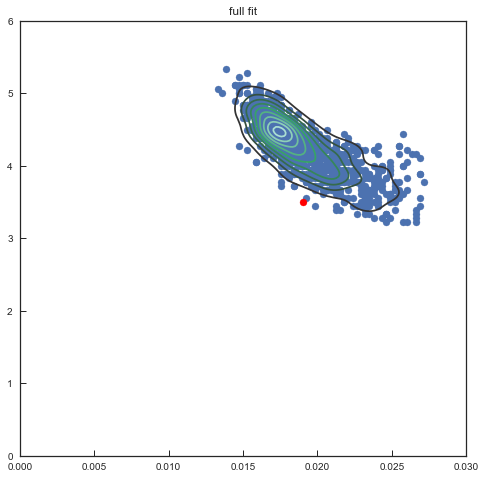

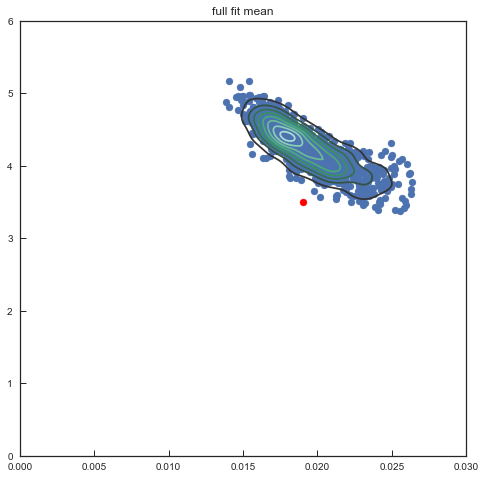

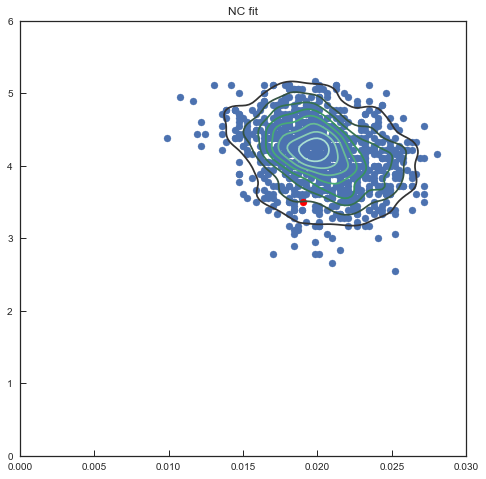

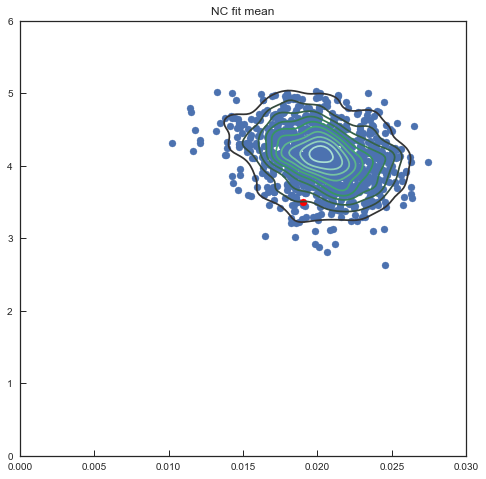

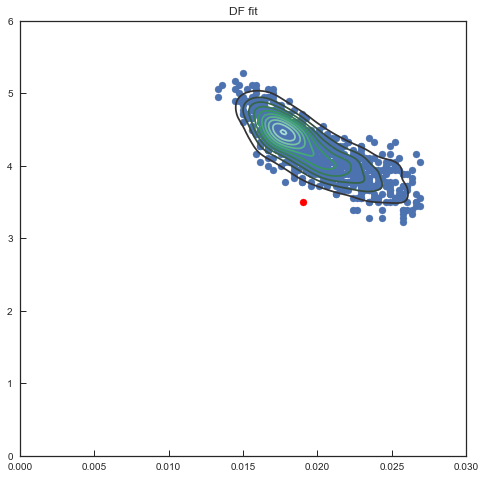

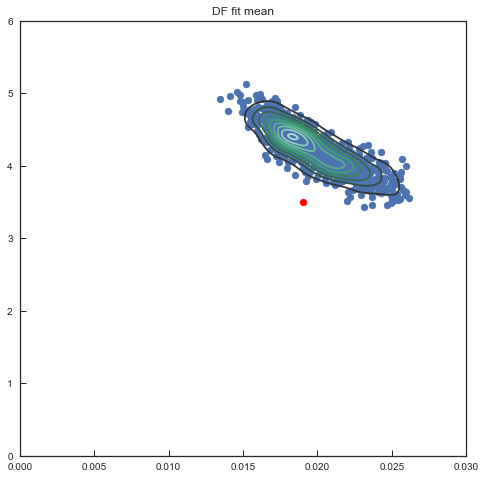

In [97]:
%matplotlib inline

Plot_2d(m,a,0.019,3.5,'full fit')
Plot_2d(m_mn,a_mn,0.019,3.5,'full fit mean')
Plot_2d(mnc,anc,0.019,3.5,'NC fit')
Plot_2d(mnc_mn,anc_mn,0.019,3.5,'NC fit mean')
Plot_2d(mdf,adf,0.019,3.5,'DF fit')
Plot_2d(mdf_mn,adf_mn,0.019,3.5,'DF fit mean')

In [98]:
print np.median(m),np.mean(m)
print np.median(m_mn),np.mean(m_mn)
print np.median(mnc),np.mean(mnc)
print np.median(mnc_mn),np.mean(mnc_mn)
print np.median(mdf),np.mean(mdf)
print np.median(mdf_mn),np.mean(mdf_mn)

0.0186868686869 0.0191637171717
0.0190502681291 0.0194214769084
0.020101010101 0.0202115959596
0.0202267724225 0.0202019093154
0.0189696969697 0.0195005656566
0.0194835334226 0.0198114999931


In [99]:
med =np.array([np.median(m),np.median(m_mn),np.median(mnc),np.median(mnc_mn),np.median(mdf),np.median(mdf_mn)])
mn =np.array([np.mean(m),np.mean(m_mn),np.mean(mnc),np.mean(mnc_mn),np.mean(mdf),np.mean(mdf_mn)])

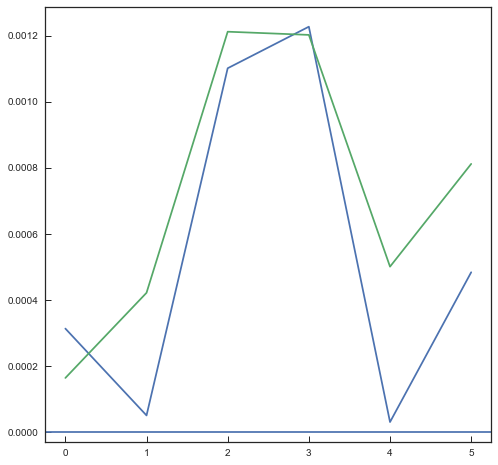

In [100]:
plt.figure(figsize=[8,8])
plt.plot(np.abs(med-0.019))
plt.plot(np.abs(mn-0.019))
plt.axhline(0.0)
plt.show()
plt.close()

In [101]:
med =np.array([np.median(a),np.median(a_mn),np.median(anc),np.median(anc_mn),np.median(adf),np.median(adf_mn)])
mn =np.array([np.mean(a),np.mean(a_mn),np.mean(anc),np.mean(anc_mn),np.mean(adf),np.mean(adf_mn)])

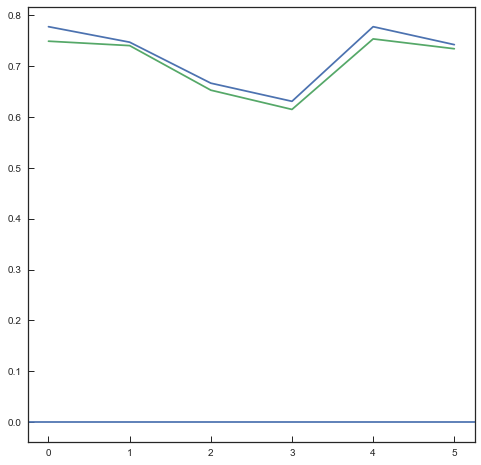

In [102]:
plt.figure(figsize=[8,8])
plt.plot(np.abs(med-3.5))
plt.plot(np.abs(mn-3.5))
plt.axhline(0)
plt.show()
plt.close()

In [103]:
print np.median(a),np.mean(a)
print np.median(a_mn),np.mean(a_mn)
print np.median(anc),np.mean(anc)
print np.median(anc_mn),np.mean(anc_mn)
print np.median(adf),np.mean(adf)
print np.median(adf_mn),np.mean(adf_mn)

4.27777777778 4.24922222222
4.24729167726 4.24055723796
4.16666666667 4.15288888889
4.13097412251 4.11499565481
4.27777777778 4.25372222222
4.24243934197 4.23438694337


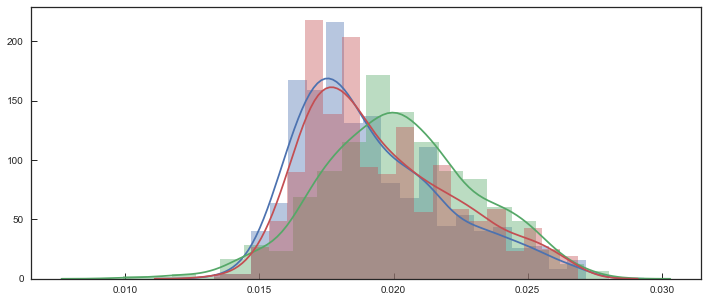

In [104]:
plt.figure(figsize=[12,5])
sea.distplot(m,20)
# sea.distplot(m_mn,20)
sea.distplot(mnc,20)
# sea.distplot(mnc_mn,20)
sea.distplot(mdf,20)
# sea.distplot(mdf_mn,20)
plt.show()
plt.close()

In [83]:
print m[:10]
print mdf[:10]

[ 0.01727273  0.02349495  0.02094949  0.01783838  0.02321212  0.02321212
  0.01585859  0.01642424  0.02434343  0.01812121]
[ 0.01727273  0.02349495  0.02094949  0.01783838  0.02321212  0.02321212
  0.01585859  0.01642424  0.02434343  0.01812121]


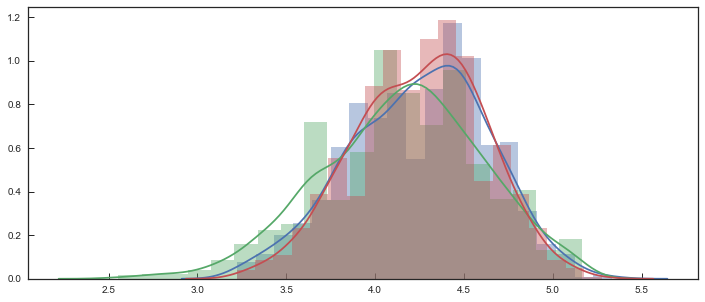

In [105]:
plt.figure(figsize=[12,5])
sea.distplot(a,20)
# sea.distplot(m_mn,20)
sea.distplot(anc,20)
# sea.distplot(mnc_mn,20)
sea.distplot(adf,20)
# sea.distplot(mdf_mn,20)
plt.show()
plt.close()